### Stock Market Prediction and Forecasting using LSTM (Long Short Term Memory)

#### Using Keras and Tensorflow > 2.0

In [5]:
## Data collection

import pandas_datareader as pdr

In [6]:
### Use tiingo to fetch Apple stock data

df = pdr.get_data_tiingo('AAPL', api_key="ca39a7203877ffeae85cd3bf89ff533a986cc056")

In [7]:
### Since we only have 50 request a day, will write data frames to csv file first

df.to_csv('AAPL.csv')

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('AAPL.csv')

In [10]:
df1 = df.reset_index()['close']

In [11]:
df1[1228:]

1228    132.995
1229    131.240
1230    134.430
1231    132.030
1232    134.500
1233    134.160
1234    134.840
1235    133.110
1236    133.500
1237    131.940
1238    134.320
1239    134.720
1240    134.390
1241    133.580
1242    133.480
1243    131.460
1244    132.540
1245    127.850
1246    128.100
1247    129.740
1248    130.210
1249    126.850
1250    125.910
1251    122.770
1252    124.970
1253    127.450
1254    126.270
1255    124.850
1256    124.690
Name: close, dtype: float64

In [12]:
df1.shape

(1257,)

In [13]:
df1

0        96.43
1        97.90
2        99.62
3       100.41
4       100.35
         ...  
1252    124.97
1253    127.45
1254    126.27
1255    124.85
1256    124.69
Name: close, Length: 1257, dtype: float64

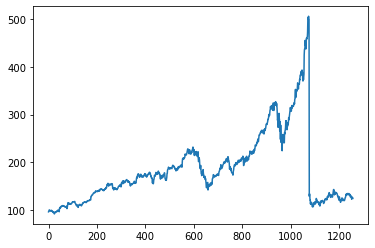

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [19]:
df1.shape

(1257, 1)

In [20]:
df1

array([[0.01060258],
       [0.01415288],
       [0.01830697],
       ...,
       [0.08267117],
       [0.07924164],
       [0.07885521]])

In [21]:
### Splitting data set into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1), :1]

In [22]:
training_size, test_size

(817, 440)

In [23]:
import numpy

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i + time_step)] ### i = 0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [25]:
print(x_train), print(y_train)

[[[0.01060258]
  [0.01415288]
  [0.01830697]
  ...
  [0.05798817]
  [0.05859196]
  [0.06110373]]

 [[0.01415288]
  [0.01830697]
  [0.02021495]
  ...
  [0.05859196]
  [0.06110373]
  [0.06023427]]

 [[0.01830697]
  [0.02021495]
  [0.02007004]
  ...
  [0.06110373]
  [0.06023427]
  [0.06180413]]

 ...

 [[0.23354667]
  [0.2288371 ]
  [0.23289458]
  ...
  [0.26190074]
  [0.28240551]
  [0.26738317]]

 [[0.2288371 ]
  [0.23289458]
  [0.23349837]
  ...
  [0.28240551]
  [0.26738317]
  [0.26494385]]

 [[0.23289458]
  [0.23349837]
  [0.23646903]
  ...
  [0.26738317]
  [0.26494385]
  [0.27644004]]]
[0.06023427 0.06180413 0.06161092 0.0614177  0.06057239 0.06042748
 0.05931651 0.06185243 0.06330153 0.05687719 0.05419635 0.05236083
 0.0519261  0.046975   0.04721652 0.04296583 0.04057481 0.04436662
 0.04593648 0.04550175 0.03803888 0.03958459 0.03301534 0.03639657
 0.04335225 0.04325565 0.04352131 0.04755464 0.0477237  0.04634706
 0.04769955 0.04716822 0.04690255 0.04463229 0.04214467 0.04313489
 0.0

(None, None)

In [26]:
print(x_train.shape), print(y_train.shape)

(716, 100, 1)
(716,)


(None, None)

In [27]:
print(x_test.shape), print(y_test.shape)

(339, 100, 1)
(339,)


(None, None)

In [28]:
### Before implementing any kind of LSTM, x_train have to reshape to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
### Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 20s 563ms/step - loss: 0.0111 - val_loss: 0.0472
Epoch 2/100
12/12 [==============================] - 4s 324ms/step - loss: 0.0028 - val_loss: 0.0279
Epoch 3/100
12/12 [==============================] - 4s 308ms/step - loss: 0.0014 - val_loss: 0.0243
Epoch 4/100
12/12 [==============================] - 4s 309ms/step - loss: 6.4614e-04 - val_loss: 0.0192
Epoch 5/100
12/12 [==============================] - 4s 306ms/step - loss: 3.9973e-04 - val_loss: 0.0200
Epoch 6/100
12/12 [==============================] - 4s 308ms/step - loss: 4.0355e-04 - val_loss: 0.0182
Epoch 7/100
12/12 [==============================] - 4s 309ms/step - loss: 4.0951e-04 - val_loss: 0.0177
Epoch 8/100
12/12 [==============================] - 4s 311ms/step - loss: 3.7968e-04 - val_loss: 0.0173
Epoch 9/100
12/12 [==============================] - 4s 308ms/step - loss: 3.4348e-04 - val_loss: 0.0169
Epoch 10/100
12/12 [==============================] - 4s 310ms/ste

12/12 [==============================] - 4s 309ms/step - loss: 1.1627e-04 - val_loss: 0.0070
Epoch 79/100
12/12 [==============================] - 5s 443ms/step - loss: 1.2293e-04 - val_loss: 0.0065
Epoch 80/100
12/12 [==============================] - 5s 384ms/step - loss: 1.2091e-04 - val_loss: 0.0067
Epoch 81/100
12/12 [==============================] - 4s 338ms/step - loss: 1.1244e-04 - val_loss: 0.0066
Epoch 82/100
12/12 [==============================] - 190s 17s/step - loss: 1.1745e-04 - val_loss: 0.0077
Epoch 83/100
12/12 [==============================] - 4s 318ms/step - loss: 1.1464e-04 - val_loss: 0.0064
Epoch 84/100
12/12 [==============================] - 3s 281ms/step - loss: 1.1219e-04 - val_loss: 0.0061
Epoch 85/100
12/12 [==============================] - 4s 297ms/step - loss: 1.2140e-04 - val_loss: 0.0060
Epoch 86/100
12/12 [==============================] - 3s 286ms/step - loss: 1.1953e-04 - val_loss: 0.0074
Epoch 87/100
12/12 [==============================] - 3s 27

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.5.0'

In [37]:
### Lets do the prediction and check performance matrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [78]:
### Teansform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [79]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

333.20718305164746

In [80]:
### Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

255.69839145572496

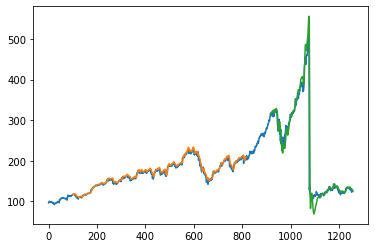

In [44]:
### Plotting
### Shift train prediction for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict
### Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1 : len(df1)-1, :] = test_predict
# Plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

440

In [46]:
x_input = test_data[len(test_data) - 100 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [47]:
x_input = test_data[len(test_data) - 100 : ].reshape(1, -1)

In [48]:
x_input.shape

(1, 100)

In [50]:
temp_input = list(x_input)
temp_input= temp_input[0].tolist()

In [51]:
temp_input

[0.09643762830576016,
 0.1078372177273276,
 0.10344161333172322,
 0.10066417099384131,
 0.09817654872599926,
 0.09025480014491002,
 0.09411906774544135,
 0.08346818017147686,
 0.09390170269291145,
 0.09663084168578676,
 0.08921627822726722,
 0.08878154812220748,
 0.09382924767540149,
 0.08904721651974398,
 0.08477237048665617,
 0.08643883588938531,
 0.0965825383407801,
 0.10827194783238739,
 0.11358531578311795,
 0.12288370969689646,
 0.12346334983697618,
 0.1208066658616109,
 0.10880328462746044,
 0.09641347663325686,
 0.10167854123898076,
 0.10373143340176308,
 0.10119550778891437,
 0.10952783480256004,
 0.10800627943485083,
 0.10836855452240066,
 0.10619490399710177,
 0.10469750030189587,
 0.10406955681680954,
 0.10464919695688926,
 0.0993841323511653,
 0.09370848931288492,
 0.09097935032000967,
 0.0913657770800628,
 0.08201907982127762,
 0.0816809564062311,
 0.08044922110856176,
 0.06991909189711384,
 0.07057118705470353,
 0.0863422291993721,
 0.0798937326409854,
 0.072503320854969

In [52]:
# Demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i < 30):
    
    if (len(temp_input) > 100):
#         print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
        
print(lst_output)

[0.08648189]
101
1 day input [0.10783722 0.10344161 0.10066417 0.09817655 0.0902548  0.09411907
 0.08346818 0.0939017  0.09663084 0.08921628 0.08878155 0.09382925
 0.08904722 0.08477237 0.08643884 0.09658254 0.10827195 0.11358532
 0.12288371 0.12346335 0.12080667 0.10880328 0.09641348 0.10167854
 0.10373143 0.10119551 0.10952783 0.10800628 0.10836855 0.1061949
 0.1046975  0.10406956 0.1046492  0.09938413 0.09370849 0.09097935
 0.09136578 0.08201908 0.08168096 0.08044922 0.06991909 0.07057119
 0.08634223 0.07989373 0.07250332 0.06784205 0.07095761 0.05873687
 0.07014853 0.06747977 0.0722618  0.0700157  0.07716459 0.08098056
 0.07902427 0.06880811 0.06750392 0.07571549 0.0736626  0.06774544
 0.06895302 0.07045043 0.07088516 0.06728656 0.07272069 0.07477358
 0.08177756 0.08252626 0.0866079  0.09254921 0.09891317 0.09467456
 0.10237894 0.09658254 0.102548   0.10172684 0.10336916 0.09919092
 0.10013283 0.09636517 0.10211327 0.10307934 0.10228233 0.10032605
 0.10008453 0.09520589 0.09781427 

9 day output [[0.09790178]]
10 day input [0.08921628 0.08878155 0.09382925 0.08904722 0.08477237 0.08643884
 0.09658254 0.10827195 0.11358532 0.12288371 0.12346335 0.12080667
 0.10880328 0.09641348 0.10167854 0.10373143 0.10119551 0.10952783
 0.10800628 0.10836855 0.1061949  0.1046975  0.10406956 0.1046492
 0.09938413 0.09370849 0.09097935 0.09136578 0.08201908 0.08168096
 0.08044922 0.06991909 0.07057119 0.08634223 0.07989373 0.07250332
 0.06784205 0.07095761 0.05873687 0.07014853 0.06747977 0.0722618
 0.0700157  0.07716459 0.08098056 0.07902427 0.06880811 0.06750392
 0.07571549 0.0736626  0.06774544 0.06895302 0.07045043 0.07088516
 0.06728656 0.07272069 0.07477358 0.08177756 0.08252626 0.0866079
 0.09254921 0.09891317 0.09467456 0.10237894 0.09658254 0.102548
 0.10172684 0.10336916 0.09919092 0.10013283 0.09636517 0.10211327
 0.10307934 0.10228233 0.10032605 0.10008453 0.09520589 0.09781427
 0.08648714 0.08709093 0.09105181 0.09218693 0.08407197 0.08180171
 0.07421809 0.07953146 0.0

19 day output [[0.10898564]]
20 day input [0.12346335 0.12080667 0.10880328 0.09641348 0.10167854 0.10373143
 0.10119551 0.10952783 0.10800628 0.10836855 0.1061949  0.1046975
 0.10406956 0.1046492  0.09938413 0.09370849 0.09097935 0.09136578
 0.08201908 0.08168096 0.08044922 0.06991909 0.07057119 0.08634223
 0.07989373 0.07250332 0.06784205 0.07095761 0.05873687 0.07014853
 0.06747977 0.0722618  0.0700157  0.07716459 0.08098056 0.07902427
 0.06880811 0.06750392 0.07571549 0.0736626  0.06774544 0.06895302
 0.07045043 0.07088516 0.06728656 0.07272069 0.07477358 0.08177756
 0.08252626 0.0866079  0.09254921 0.09891317 0.09467456 0.10237894
 0.09658254 0.102548   0.10172684 0.10336916 0.09919092 0.10013283
 0.09636517 0.10211327 0.10307934 0.10228233 0.10032605 0.10008453
 0.09520589 0.09781427 0.08648714 0.08709093 0.09105181 0.09218693
 0.08407197 0.08180171 0.07421809 0.07953146 0.08552107 0.08267117
 0.07924164 0.07885521 0.08648189 0.08694247 0.08799737 0.08942462
 0.09099818 0.0925659

29 day output [[0.12269297]]
[[0.08648189157247543], [0.08694247156381607], [0.08799736946821213], [0.08942461758852005], [0.09099818021059036], [0.09256595373153687], [0.09405157715082169], [0.09543106704950333], [0.09670884162187576], [0.09790177643299103], [0.09903042763471603], [0.10011538863182068], [0.10117562115192413], [0.10222795605659485], [0.1032867282629013], [0.10436353832483292], [0.10546710342168808], [0.10660339146852493], [0.10777584463357925], [0.10898564010858536], [0.11023223400115967], [0.11151383072137833], [0.11282776296138763], [0.11417096853256226], [0.11554034054279327], [0.11693296581506729], [0.11834627389907837], [0.11977827548980713], [0.12122748792171478], [0.12269297242164612]]


In [62]:
# 100 element with newly predicted day
day_new = np.arange(1, 101)
#next thirty days
day_pred = np.arange(101, 131)

In [64]:
import matplotlib.pyplot as plt

In [65]:
len(df1)

1257

In [66]:
df3 = df1.tolist()
df3.extend(lst_output)

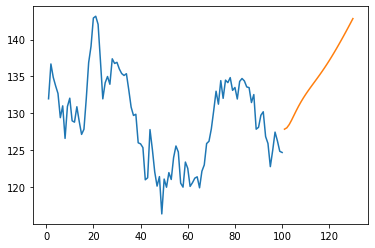

In [68]:
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

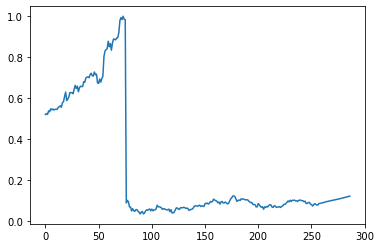

In [74]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])